In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.io import loadmat
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import copy
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import scipy.optimize
import networkx as nx
from sklearn import svm


In [3]:

# task 1
# Загрузите данные ex5data1.mat из файла.

data = loadmat('G:/Labs/bsuir-labs/11cem/ml/lab05/data/ex5data1.mat')

x = data["X"]
y = data["y"]
x1 = x[:, 0]
x2 = x[:, 1]

y_red = y[20:50]
x1_red = x1[20:50]
x2_red = x2[20:50]

y_temp = list(y)
x1_temp = list(x1)
x2_temp = list(x2)
del y_temp[20:50]
del x1_temp[20:50]
del x2_temp[20:50]

y_blue = np.array(y_temp)
x1_blue = np.array(x1_temp)
x2_blue = np.array(x2_temp)

Task 1


No handles with labels found to put in legend.


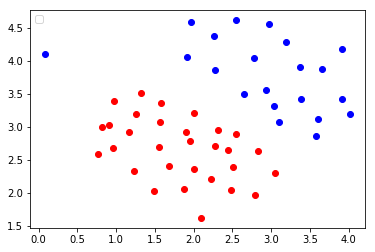

In [4]:

# task 2
# Постройте график для загруженного набора данных: по осям - переменные X1, X2, а точки, принадлежащие различным классам должны быть обозначены различными маркерами.

def show_data(x1_red, x2_red,x1_blue, x2_blue ):
    plt.plot(x1_red, x2_red, 'ro')#, label='train')
    plt.plot(x1_blue, x2_blue, 'bo')#, label="validation")
    # plt.plot(xtest, ytest, 'ro', label="test")
    plt.legend(loc='upper left')
    plt.show()

print("Task 1")
show_data(x1_red, x2_red,x1_blue, x2_blue)


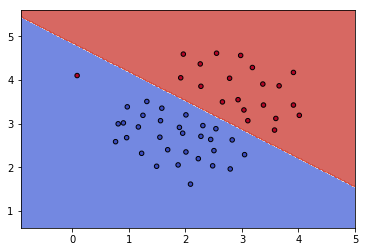

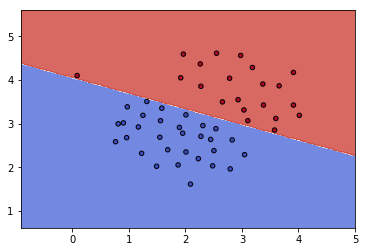

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def SVM_classify(X, y, C=1.0):
    clf = svm.SVC(kernel='linear', C=C).fit(X, y)
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.show()

# task 3
# Обучите классификатор с помощью библиотечной реализации SVM с линейным ядром на данном наборе.

# task 4
# Постройте разделяющую прямую для классификаторов с различными параметрами C = 1, C = 100 (совместно с графиком из пункта 2). Объясните различия в полученных прямых?

C = 1.0
SVM_classify(x, y.squeeze(), C)

C = 100.0
SVM_classify(x, y.squeeze(), C)

In [6]:

# task 5
#Реализуйте функцию вычисления Гауссового ядра для алгоритма SVM.
#k(x1,x2) = exp(-q * ||x1-x2||^2), q>0 \\ q=1/(2*sigm^2)

def gauss_kernel(x, gamma=0.5): #q>0
    x0, x1 = x[:, 0], x[:, 1]
    return np.exp(-gamma * max(x0 - x1) ** 2)

gauss_kernel(x)


0.7096682866649016

In [7]:
from scipy.io import loadmat

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

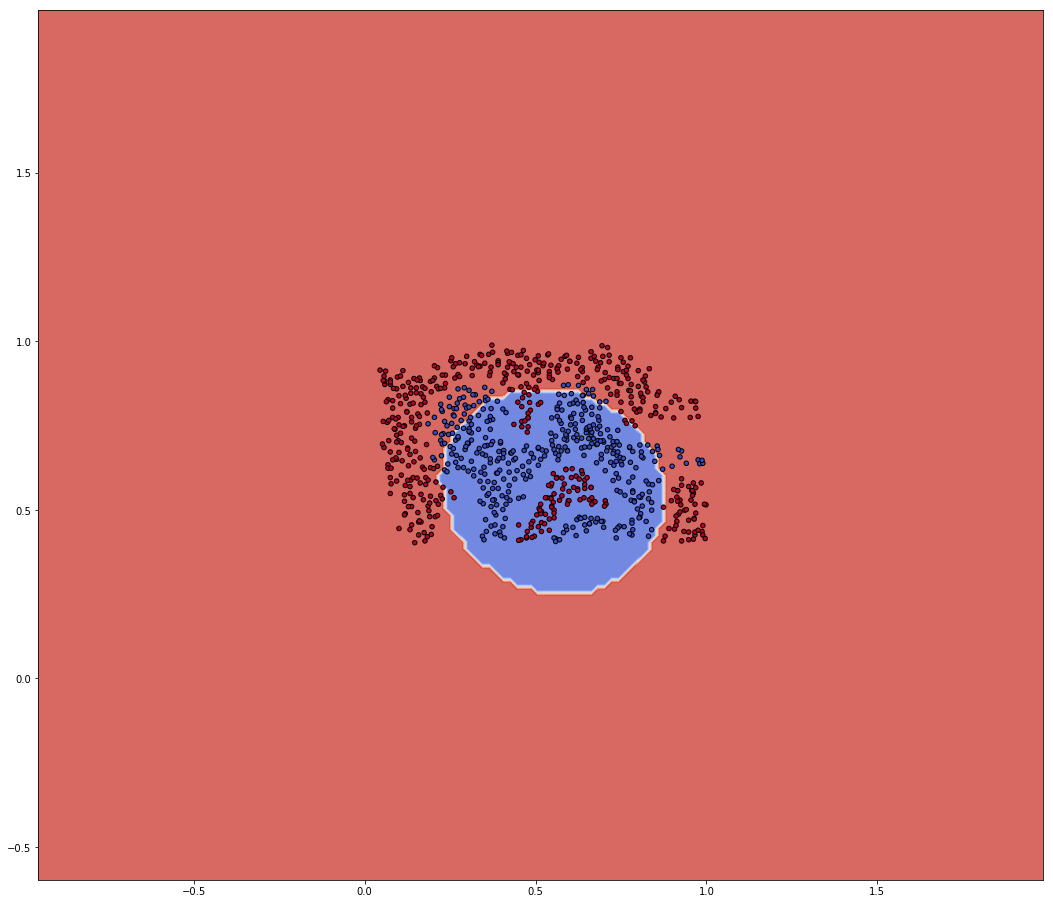

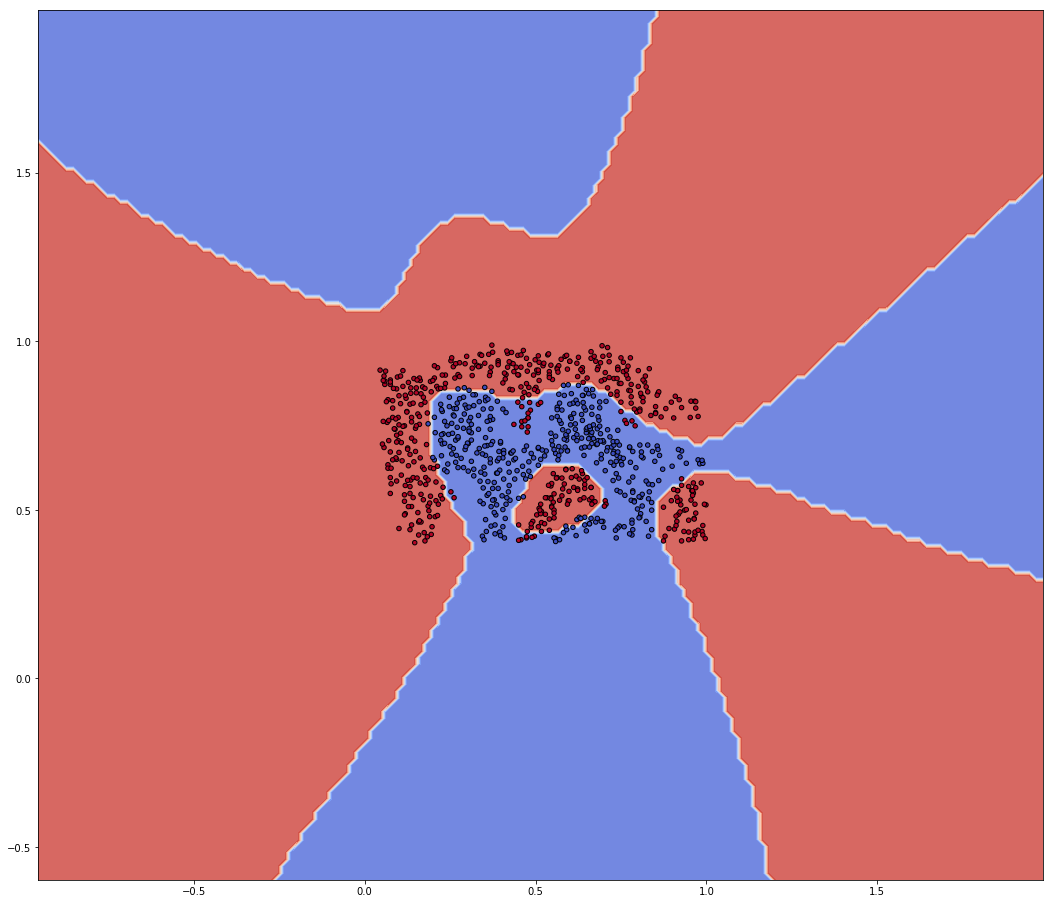

In [13]:
def SVM_classify(X, y, C=1.0, gamma=10, kernel='linear'):
    clf = svm.SVC(kernel=kernel, C=C,gamma=gamma).fit(X, y)
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(18, 16))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.show()

# task 6
# Загрузите данные ex5data2.mat из файла.
data = loadmat('G:/Labs/bsuir-labs/11cem/ml/lab05/data/ex5data2.mat')

x = data["X"]
y = data["y"]

# task 7
#Обработайте данные с помощью функции Гауссового ядра.

# task 8
#Обучите классификатор SVM.
# task 9
#Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).

SVM_classify(x,y.squeeze(), gamma=gauss_kernel(x), kernel='rbf', C=1)
SVM_classify(x,y.squeeze(), gamma=gauss_kernel(x), kernel='rbf', C=1000000)


In [15]:
# task 10
# Загрузите данные ex5data3.mat из файла.

data = loadmat('G:/Labs/bsuir-labs/11cem/ml/lab05/data/ex5data3.mat')

x = data["X"]
y = data["y"]
xval = data["Xval"]
yval = data["yval"]


{'C': 100, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.7729857338398612, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Train quality: 94.0%


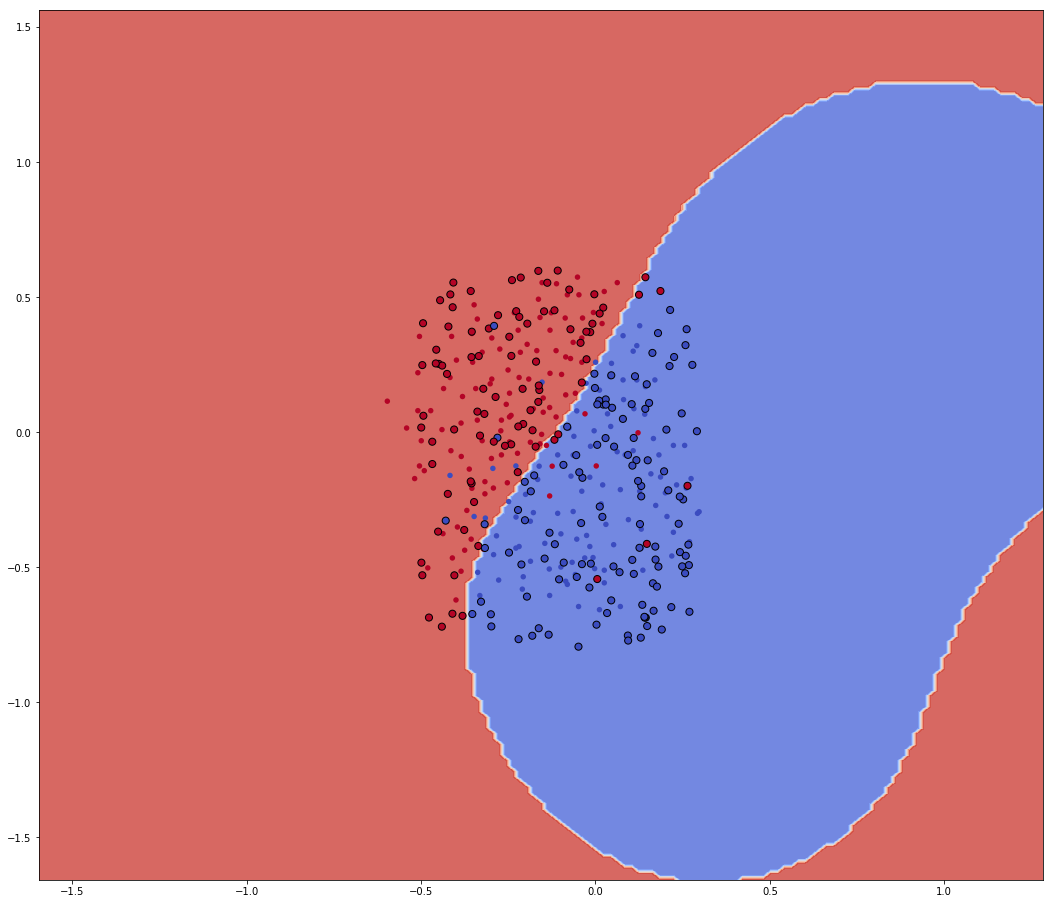

In [19]:
def get_train_quality(Xval, model, yval):
    predicted = model.predict(Xval)
    error_count = 0
    for p, val in zip(predicted, yval.squeeze()):
        error_count += 1 if p != val else 0
    print("Train quality: {}%".format(100*(len(predicted)-float(error_count)) / len(predicted)))

def SVM_classify(X, y, Xval, yval,C=1.0, gamma=10, kernel='linear'):
    model = svm.SVC(kernel=kernel, C=C, gamma=gamma).fit(X, y)
    clf = model.fit(X, y)
    print(model.get_params())

    get_train_quality(Xval, model, yval)

    X0, X1 = X[:, 0], X[:, 1]
    X0val, X1val = Xval[:, 0], Xval[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(18, 16))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='none') #no edges = train
    plt.scatter(X0val, X1val, c=yval, cmap=plt.cm.coolwarm, s=50, edgecolors='k') # edges = validate
    plt.show()

# task 10
# Загрузите данные ex5data3.mat из файла.

def gauss_kernel(x, gamma=0.5): #q>0
    x0, x1 = x[:, 0], x[:, 1]
    return np.exp(-gamma * max(x0 - x1) ** 2)

# task 11
#Вычислите параметры классификатора SVM на обучающей выборке, а также подберите параметры C и σ2
#на валидационной выборке.

# task 12
#Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).

SVM_classify(x,y.squeeze(),xval,yval.squeeze(), gamma=gauss_kernel(x), kernel='rbf', C=100)


In [21]:

# task 13
# Загрузите данные spamTrain.mat из файла.

train_data = loadmat('G:/Labs/bsuir-labs/11cem/ml/lab05/data/spamTrain.mat')

x = train_data["X"]
y = train_data["y"]

# task 15
# Загрузите данные spamTest.mat из файла.

test_data = loadmat('G:/Labs/bsuir-labs/11cem/ml/lab05/data/spamTest.mat')

x_test = test_data["Xtest"]
y_test = test_data["ytest"]

In [22]:

# task 16
# Подберите параметры C и σ2.

model = svm.SVC(kernel='rbf', C=1)

In [23]:
# task 14
# Обучите классификатор SVM.
model.fit(x, y.squeeze())

def get_train_quality(Xval, model, yval):
    predicted = model.predict(Xval)
    error_count = 0
    for p, val in zip(predicted, yval.squeeze()):
        error_count += 1 if p != val else 0
    print("Quality: {}%".format(100*(len(predicted)-float(error_count)) / len(predicted)))

# print("Train...")
# get_train_quality(x, model, y)

print("Test...")
get_train_quality(x_test, model, y_test)

print(model.predict(x_test[:10]))
print(y_test[:10].squeeze())

c:\users\harwister\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test...
Quality: 95.3%
[1 0 0 1 1 1 1 0 1 0]
[1 0 0 1 1 1 1 0 1 1]


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

from bs4 import BeautifulSoup
import re
from nltk.stem import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [25]:

# task 17
# Реализуйте функцию предобработки текста письма

# import nltk #1.11.0
# nltk.download('punkt')
class MailPreprocessor:
    def low_registry(self, message):
        return message.lower()

    def dollar(self, message):
        return message.replace("$", "dollar")

    def html_tags(self, message):
        return BeautifulSoup(message, "lxml").text

    def url(self, message):
        return re.sub(r'^https?:\/\/.*[\r\n]*', 'httpaddr', message, flags=re.MULTILINE)

    def email(self, message):
        return re.sub(r'[\w\.-]+@[\w\.-]+', 'emailaddr', message, flags=re.MULTILINE)

    def numbers(self, message):
        return re.sub(r'\d+', ' number ', message, flags=re.MULTILINE)

    def stem(self, sentence):
        lancaster = SnowballStemmer(language="english")
        token_words = word_tokenize(sentence)
        stem_sentence = []
        for word in token_words:
            stem_sentence.append(lancaster.stem(word))
            stem_sentence.append(" ")
        return "".join(stem_sentence)

    def non_letters(self, message):
        return re.sub(r'([^\s\w]|_)+', '', message, flags=re.MULTILINE)

    filter_order = [low_registry, dollar, html_tags, url, email, numbers, non_letters, stem]

    def filter(self, message):
        for method in self.filter_order:
            message = method(self, message)
        return message

In [26]:

# task 18
# Загрузите коды слов из словаря vocab.txt.

# task 19
# Реализуйте функцию замены слов в тексте письма после предобработки на их соответствующие коды.

# task 20
# Реализуйте функцию преобразования текста письма в вектор признаков (в таком же формате как в файлах spamTrain.mat и spamTest.mat).

def one_hot_convert(message):
    message_words = message.split()
    message_words.sort()
    vocab_file = open("G:/Labs/bsuir-labs/11cem/ml/lab05/data/vocab.txt", "r")
    vocab = vocab_file.readlines()
    # one_hot = [int(record.split()[1] in message) for record in vocab]
    one_hot = []
    for record in vocab:
        word = record.split()[1]
        one_hot.append(int(word in message_words))
        pass
    return np.array([one_hot])


train_data = loadmat('G:/Labs/bsuir-labs/11cem/ml/lab05/data/spamTrain.mat')

x = train_data["X"]
y = train_data["y"]

test_data = loadmat('G:/Labs/bsuir-labs/11cem/ml/lab05/data/spamTest.mat')

x_test = test_data["Xtest"]
y_test = test_data["ytest"]

model = svm.SVC(kernel='rbf', C=1)

model.fit(x, y.squeeze())


def get_train_quality(Xval, model, yval):
    predicted = model.predict(Xval)
    error_count = 0
    for p, val in zip(predicted, yval.squeeze()):
        error_count += 1 if p != val else 0
    print("Quality: {}%".format(100 * (len(predicted) - float(error_count)) / len(predicted)))


c:\users\harwister\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [28]:
def spam_check(file_path, model):
    print("Checking file {}...".format(file_path))
    f = open(file_path, "r")
    text = f.read()
    f.close()
    processor = MailPreprocessor()
    clean_text = processor.filter(text)
    # print(clean_text)
    print("Spam: {}".format(model.predict(one_hot_convert(clean_text))[0] == 1))


# task 21
# Проверьте работу классификатора на письмах из файлов emailSample1.txt, emailSample2.txt, spamSample1.txt и spamSample2.txt.


spam_check("G:/Labs/bsuir-labs/11cem/ml/lab05/data/spamSample1.txt", model)
spam_check("G:/Labs/bsuir-labs/11cem/ml/lab05/data/spamSample2.txt", model)

spam_check("G:/Labs/bsuir-labs/11cem/ml/lab05/data/emailSample1.txt", model)
spam_check("G:/Labs/bsuir-labs/11cem/ml/lab05/data/emailSample2.txt", model)

Checking file G:/Labs/bsuir-labs/11cem/ml/lab05/data/spamSample1.txt...
Spam: True
Checking file G:/Labs/bsuir-labs/11cem/ml/lab05/data/spamSample2.txt...
Spam: False
Checking file G:/Labs/bsuir-labs/11cem/ml/lab05/data/emailSample1.txt...
Spam: False
Checking file G:/Labs/bsuir-labs/11cem/ml/lab05/data/emailSample2.txt...
Spam: False


In [30]:

def vector_to_message(vector):
    vocab_file = open("G:/Labs/bsuir-labs/11cem/ml/lab05/data/vocab.txt", "r")
    vocab = vocab_file.readlines()
    # one_hot = [int(record.split()[1] in message) for record in vocab]
    message_words = []
    for vocab_record, vector_enterance in zip(vocab, vector):
        is_trigger_word = bool(vector_enterance)
        word = vocab_record.split()[1]
        if is_trigger_word:
            message_words.append(word)
    return " ".join(message_words)


vector_to_message(x_test[0])

print("my examples")
# task 22
# Также можете проверить его работу на собственных примерах.
print("Spam: {}".format(model.predict(one_hot_convert(vector_to_message(x_test[0])))[0] == 1))
my_spam="be below call charset citi commiss commun content do doe don each encod fight fill for form format from go here html httpaddr immedi in increas inform instead insur is iso it keep legal list mail messag mime more multi name nbsp new nextpart not notic now number numberbit numberdnumb or our out part payment per phone plain pleas premium printabl profession quot rang receiv remove"
print("Spam: {}".format(model.predict(one_hot_convert(my_spam))[0] == 1))


my examples
Spam: True
Spam: True


In [ ]:

def genarate_vocab_name():
    return "vocab_"+datetime.strftime(datetime.now(), "%m%d_%H%M")+".txt"


def get_vocab(file_paths):
    words = set()
    for path in tqdm(file_paths):
        print("Checking file {}...".format(path))
        f = open(path, "r")
        text = f.read()
        processor = MailPreprocessor()
        clean_text = processor.filter(text)
        for word in clean_text.split():
            words.add(word)
        f.close()
    word_list = list(words)
    word_list.sort()
    return word_list

def create_vocab(file_paths):

    word_list = get_vocab(file_paths)
    f = open(genarate_vocab_name(), "a+")
    f.write('\n'.join(word_list))
    f.close()


spam_emails=['20021010_spam.tar/20021010_spam/spam/0000.7b1b73cf36cf9dbc3d64e3f2ee2b91f1',
'20021010_spam.tar/20021010_spam/spam/0001.bfc8d64d12b325ff385cca8d07b84288',
'20021010_spam.tar/20021010_spam/spam/0002.24b47bb3ce90708ae29d0aec1da08610',
'20021010_spam.tar/20021010_spam/spam/0003.4b3d943b8df71af248d12f8b2e7a224a',
'20021010_spam.tar/20021010_spam/spam/0004.1874ab60c71f0b31b580f313a3f6e777',
'20021010_spam.tar/20021010_spam/spam/0005.1f42bb885de0ef7fc5cd09d34dc2ba54']


# task 24
# Постройте собственный словарь.
vocab = get_vocab(spam_emails)

x = []
y = []

def get_files_from_folder(folder_path):
    file_names = os.listdir(folder_path)
    for file in tqdm(file_names):
        try:
            f = open(folder_path+file, "r")
            text = f.read()
            f.close()
            yield text
        except:
            print("issue with reading, skipping")
    # returns array of file str


def one_hot_convert(message):
    message_words = message.split()
    message_words.sort()
    vocab_file = open("data/vocab.txt", "r")
    vocab = vocab_file.readlines()
    # one_hot = [int(record.split()[1] in message) for record in vocab]
    one_hot = []
    for record in vocab:
        word = record.split()[1]
        one_hot.append(int(word in message_words))
        pass
    return np.array(one_hot)

# adding spam info

def add_data(folder_path, x, y, is_spam):
    for text in get_files_from_folder(folder_path):
        processor = MailPreprocessor()
        clean_text = processor.filter(text)
        x.append(one_hot_convert(clean_text))
        y.append(int(is_spam))
    return x,y

# task 23
# Создайте свой набор данных из оригинального корпуса текстов - http://spamassassin.apache.org/old/publiccorpus/.


x,y = add_data("20021010_spam.tar/20021010_spam/spam/", x, y, True)
x,y = add_data("20030228_easy_ham.tar/easy_ham/", x, y, False)
x = np.array(x)
y = np.array(y)



model = svm.SVC(kernel='rbf', C=1)
# x = array of one_hots
# y = array of 0 and 1(not_spam and spam)
model.fit(x, y)


def get_train_quality(Xval, model, yval):
    predicted = model.predict(Xval)
    error_count = 0
    for p, val in zip(predicted, yval.squeeze()):
        error_count += 1 if p != val else 0
    print("Quality: {}%".format(100 * (len(predicted) - float(error_count)) / len(predicted)))


Xval,yval = [], []
Xval,yval = add_data("20021010_spam.tar/20021010_spam/validate/", Xval, yval, True)
Xval,yval = add_data("20030228_easy_ham.tar/validate/", Xval, yval, False)

Xval = np.array(Xval)
yval = np.array(yval)

get_train_quality(Xval, model, yval)


In [31]:
# task 25
# Как изменилось качество классификации? Почему?
# изменилась в лучшую сторону потому что изначаьлная модель не настроена на спам